In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

In [2]:
df=pd.read_csv("American_Housing_Data_20231209.csv")
df.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601


In [3]:
df.isnull().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    2
Latitude                   0
Longitude                  0
dtype: int64

In [4]:
df.shape

(39981, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39981 entries, 0 to 39980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 39981 non-null  int64  
 1   Price                    39981 non-null  float64
 2   Beds                     39981 non-null  int64  
 3   Baths                    39981 non-null  int64  
 4   Living Space             39981 non-null  int64  
 5   Address                  39981 non-null  object 
 6   City                     39981 non-null  object 
 7   State                    39981 non-null  object 
 8   Zip Code Population      39981 non-null  int64  
 9   Zip Code Density         39981 non-null  float64
 10  County                   39981 non-null  object 
 11  Median Household Income  39979 non-null  float64
 12  Latitude                 39981 non-null  float64
 13  Longitude                39981 non-null  float64
dtypes: float64(5), int64(5

In [6]:
df.drop(["Median Household Income"],axis=1,inplace=True)

In [7]:
## covert categorical to numerical
encoder=LabelEncoder()
category=df.select_dtypes(include=["object", "category"])
for x in category:
    df[x]= encoder.fit_transform(df[x])
df.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Latitude,Longitude
0,10013,3999000.0,2,3,1967,33468,150,18,29563,20967.9,57,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,33468,150,18,29563,20967.9,57,40.72001,-74.00472
2,10014,1650000.0,1,1,718,5888,150,18,29815,23740.9,57,40.73407,-74.00601
3,10014,760000.0,3,2,1538,20579,150,18,29815,23740.9,57,40.73407,-74.00601
4,10014,1100000.0,1,1,600,35131,150,18,29815,23740.9,57,40.73407,-74.00601


In [8]:
x=df.drop(["Price"],axis=1)## splitting x AND Y
y=df["Price"]

In [9]:
x.head()

,Zip Code,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Latitude,Longitude
0,10013,2,3,1967,33468,150,18,29563,20967.9,57,40.72001,-74.00472
1,10013,2,3,1967,33468,150,18,29563,20967.9,57,40.72001,-74.00472
2,10014,1,1,718,5888,150,18,29815,23740.9,57,40.73407,-74.00601
3,10014,3,2,1538,20579,150,18,29815,23740.9,57,40.73407,-74.00601
4,10014,1,1,600,35131,150,18,29815,23740.9,57,40.73407,-74.00601


In [10]:
y.head()

0    3999000.0
1    3999000.0
2    1650000.0
3     760000.0
4    1100000.0
Name: Price, dtype: float64

In [11]:
print(x.isnull().sum())

Zip Code               0
Beds                   0
Baths                  0
Living Space           0
Address                0
City                   0
State                  0
Zip Code Population    0
Zip Code Density       0
County                 0
Latitude               0
Longitude              0
dtype: int64


In [12]:
print(y.isnull().sum())

0


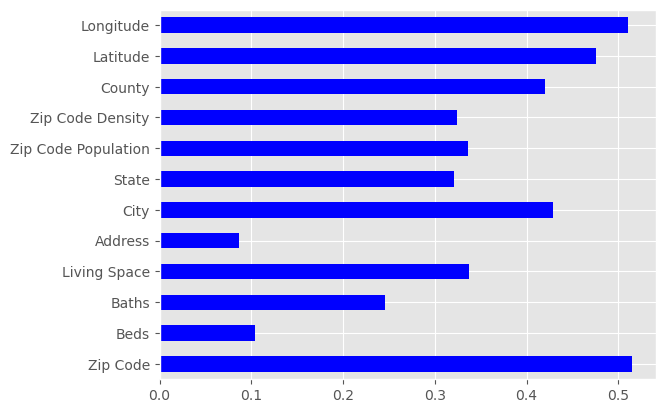

In [13]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
plt.style.use("ggplot")
importance= mutual_info_regression(x,y)
feature_impo=pd.Series(importance,x.columns[0:len(x.columns)])
feature_impo.plot(kind="barh", color="blue")
plt.show()

In [14]:
## splitting the dataset into training and testing set
xtrain, xtest, ytrain, ytest= train_test_split(x,y, test_size=0.2,random_state=1)

In [15]:
# Initialize linear regression model
Model = LinearRegression()
Model.fit(xtrain, ytrain)

LinearRegression()

In [16]:
# bringing in our machine learning algorithm
from sklearn.pipeline import Pipeline
LinearModel=Pipeline([("Scaler",StandardScaler()),("Regression",LinearRegression())])
LinearModel.fit(xtrain,ytrain)                                                   

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Regression', LinearRegression())])

In [17]:
## testing the data set.
pred1=LinearModel.predict(xtest)
pred1

array([771967.38889673, 864217.99903551, 801641.00073965, ...,
       442184.64833379, 462640.97384736, -14044.85115074])

In [18]:
## checking how our model perform usin any of these from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
print("MAE",mean_absolute_error(ytest, pred1))
print("MAPE",mean_absolute_percentage_error (ytest,pred1))
print("MsE",mean_squared_error (ytest,pred1))
print("R2 SCORE",r2_score(ytest,pred1))

MAE 302296.55145575694
MAPE 0.8493048348482284
MsE 488337822022.7036
R2 SCORE 0.4154966810049414


In [19]:
## to check how poor the prediction above is.

OUTCOME = {
    "Actual price":ytest,
    "Predicted price":pred1
}
df3=pd.DataFrame(OUTCOME)
df3

,Actual price,Predicted price
33280,959000.0,771967.388897
21569,650000.0,864217.999036
33018,700000.0,801641.000740
1305,329900.0,765283.695758
30217,498750.0,705949.146469
...,...,...
23066,265000.0,212953.316634
15574,165000.0,226240.495809
18753,775000.0,442184.648334
39015,525000.0,462640.973847


In [20]:
tree=DecisionTreeRegressor()
tree.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [21]:
## testing the data set.
pred2=tree.predict(xtest)
pred2

array([1149000.,  550000.,  599000., ...,  775000.,  525000.,  179000.])

In [22]:
## checking how our model perform usin any of these from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
print("MAE",mean_absolute_error(ytest, pred2))
print("MAPE",mean_absolute_percentage_error (ytest,pred2))
print("MsE",mean_squared_error (ytest,pred2))
print("R2 SCORE",r2_score(ytest,pred2))

MAE 191466.2522066608
MAPE 0.42739656808083853
MsE 455579302657.1027
R2 SCORE 0.4547061430434305


In [23]:
## to check how poor the prediction above is.

OUTCOME = {
    "Actual price":ytest,
    "Predicted price":pred2
}
df3=pd.DataFrame(OUTCOME)
df3

,Actual price,Predicted price
33280,959000.0,1149000.0
21569,650000.0,550000.0
33018,700000.0,599000.0
1305,329900.0,679000.0
30217,498750.0,324500.0
...,...,...
23066,265000.0,252000.0
15574,165000.0,219950.0
18753,775000.0,775000.0
39015,525000.0,525000.0


In [24]:
Forest=RandomForestRegressor()
Forest.fit(xtrain,ytrain)

RandomForestRegressor()

In [25]:
## testing the data set.
pred3=Forest.predict(xtest)
pred3

array([946153.98, 535192.33, 600489.15, ..., 620040.  , 531452.84,
       192574.28])

In [26]:
## checking how our model perform usin any of these from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
print("MAE",mean_absolute_error(ytest, pred3))
print("MAPE",mean_absolute_percentage_error (ytest,pred3))
print("MsE",mean_squared_error (ytest,pred3))
print("R2 SCORE",r2_score(ytest,pred3))

MAE 143165.27892978524
MAPE 0.37643943527218354
MsE 221637636344.4847
R2 SCORE 0.7347165666567022


In [27]:
## to check how poor the prediction above is.

OUTCOME = {
    "Actual price":ytest,
    "Predicted price":pred3
}
df3=pd.DataFrame(OUTCOME)
df3

,Actual price,Predicted price
33280,959000.0,946153.98
21569,650000.0,535192.33
33018,700000.0,600489.15
1305,329900.0,409381.98
30217,498750.0,347694.08
...,...,...
23066,265000.0,277482.97
15574,165000.0,234831.42
18753,775000.0,620040.00
39015,525000.0,531452.84


<Axes: xlabel='Price'>

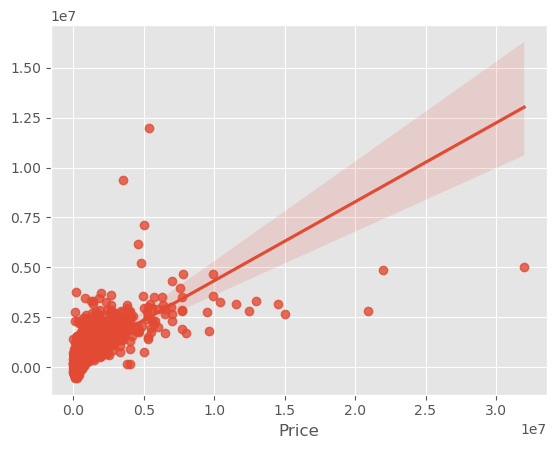

In [28]:
## SHOWING HOW THE REGRESSION WORK
sns.regplot(x=ytest, y=pred1)

<Axes: xlabel='Price'>

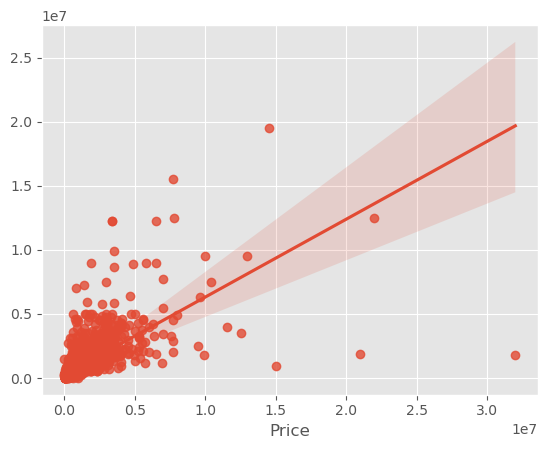

In [29]:
sns.regplot(x=ytest, y=pred2)

<Axes: xlabel='Price'>

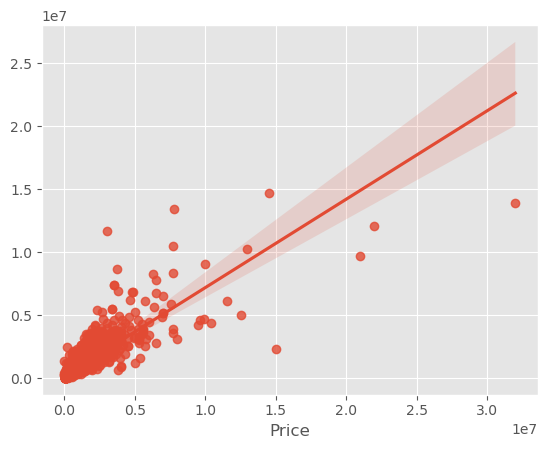

In [30]:
sns.regplot(x=ytest, y=pred3)